In [1]:
#load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import scipy

## Idle

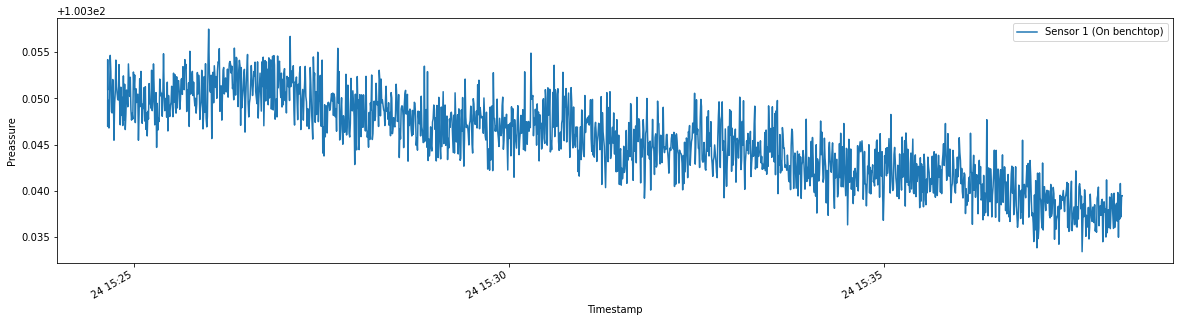

In [53]:
data11 = pd.read_csv('data/24-12/24-12-Idle-COM11.csv', sep=' ', names=['Date', 'Time', 'Preassure 1'])
data11.Time = pd.DatetimeIndex(data11.Time)
data11.index = data11.Time
data11 = data11.drop(['Time','Date'],axis=1)
ax = data11.plot(figsize=(20,5))
ax.set_xlabel('Timestamp')
ax.set_ylabel('Preassure')
ax.legend(['Sensor 1 (On benchtop)'])

In [54]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

<AxesSubplot:xlabel='Time'>

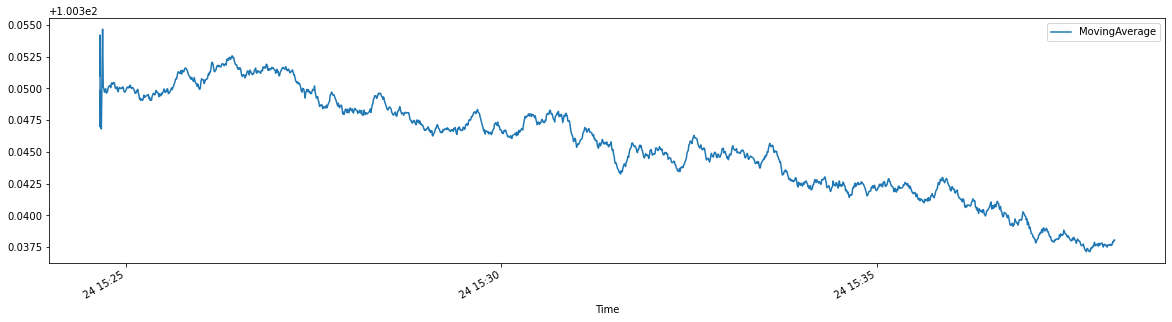

In [55]:
window = 20
data11['MovingAverage'] = np.append(np.array(data11['Preassure 1'])[:window-1], moving_average(np.array(data11['Preassure 1']), window))
data11.plot(y='MovingAverage', figsize=(20,5))

## FVC 2Hz

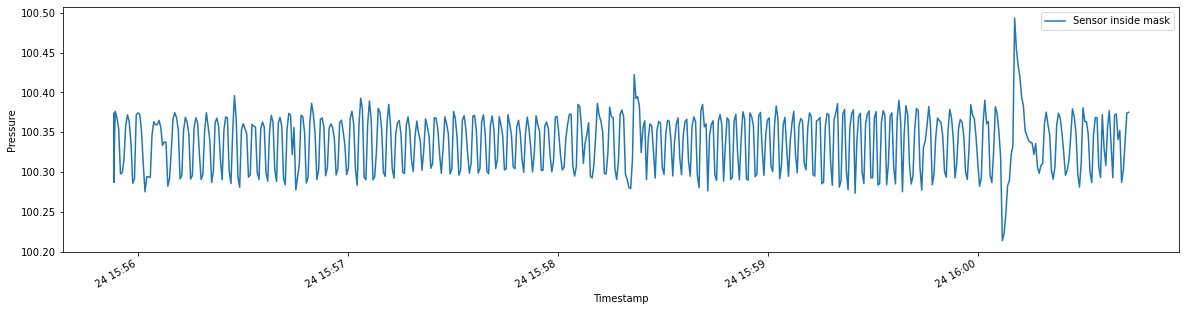

In [68]:
data11 = pd.read_csv('data/24-12/24-12-FVC-2-COM11.csv', sep=' ', names=['Date', 'Time', 'Preassure 1'])
data11.Time = pd.DatetimeIndex(data11.Time)
data11.index = data11.Time
data11 = data11.drop(['Time','Date'],axis=1)
ax = data11.plot(figsize=(20,5))
ax.set_xlabel('Timestamp')
ax.set_ylabel('Pressure')
ax.legend(['Sensor inside mask'])

<AxesSubplot:xlabel='Time'>

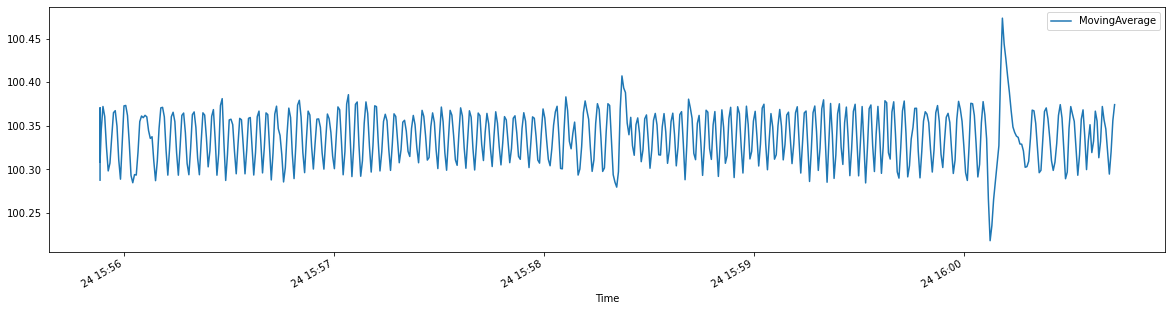

In [69]:
window = 2
data11['MovingAverage'] = np.append(np.array(data11['Preassure 1'])[:window-1], moving_average(np.array(data11['Preassure 1']), window))
data11.plot(y='MovingAverage', figsize=(20,5))

## FVC 20Hz

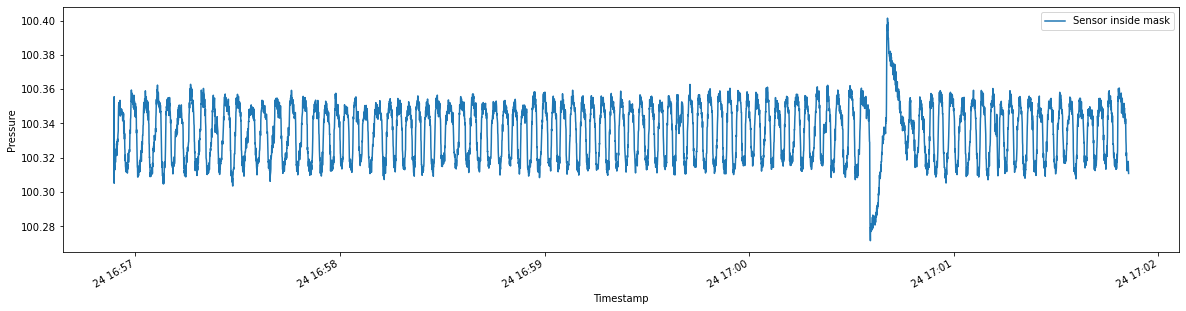

In [64]:
data11 = pd.read_csv('data/24-12/24-12-FVC-20HZ-COM11.csv', sep=' ', names=['Date', 'Time', 'Preassure 1'])
data11.Time = pd.DatetimeIndex(data11.Time)
data11.index = data11.Time
data11 = data11.drop(['Time','Date'],axis=1)
ax = data11.plot(figsize=(20,5))
ax.set_xlabel('Timestamp')
ax.set_ylabel('Pressure')
ax.legend(['Sensor inside mask'])

<AxesSubplot:xlabel='Time'>

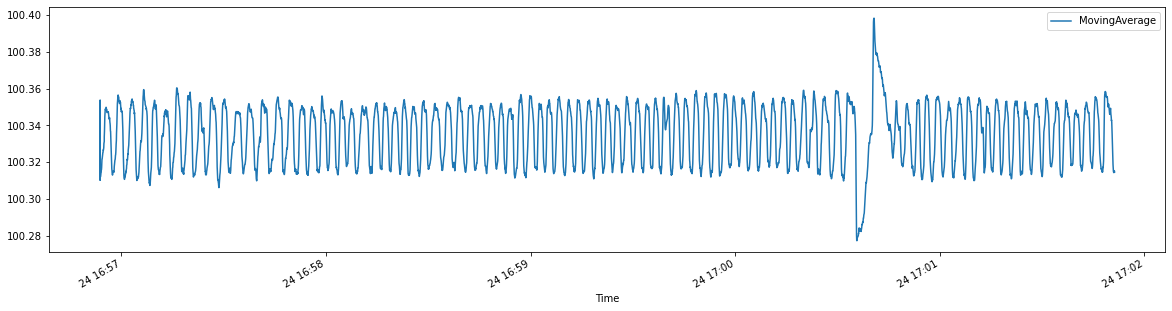

In [67]:
window = 5
data11['MovingAverage'] = np.append(np.array(data11['Preassure 1'])[:window-1], moving_average(np.array(data11['Preassure 1']), window))
data11.plot(y='MovingAverage', figsize=(20,5))

#### Analysis - 2Hz Filtered Signal

In [72]:
data11.head()

,Preassure 1,MovingAverage
Time,,
2020-12-24 15:55:53.184,100.287720,100.287720
2020-12-24 15:55:53.184,100.289505,100.288612
2020-12-24 15:55:53.184,100.343407,100.316456
2020-12-24 15:55:53.184,100.371559,100.357483
2020-12-24 15:55:53.184,100.369606,100.370582


<AxesSubplot:xlabel='Time'>

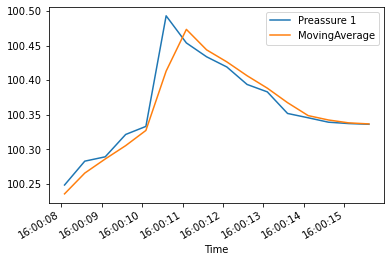

In [84]:
fvcPart = data11['2020-12-24 16:00:08':'2020-12-24 16:00:15']
fvcPart.plot()

In [132]:
#convert flow to pressure 
fvcPart['Flow'] = fvcPart['MovingAverage']**(1/2)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<AxesSubplot:xlabel='Time'>

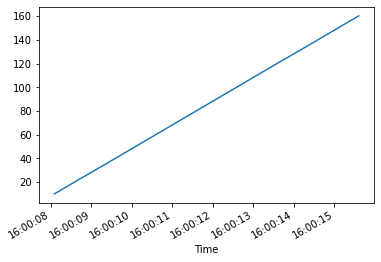

<AxesSubplot:xlabel='Time'>

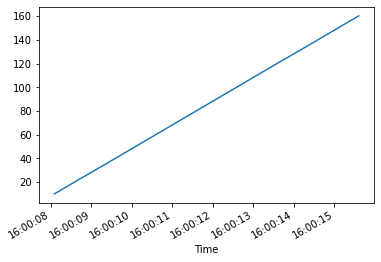

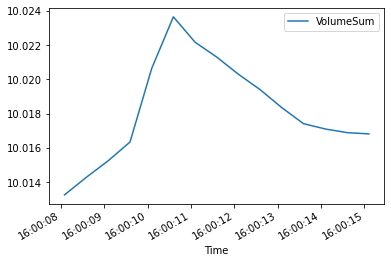

In [184]:
volume = fvcPart['Flow'].cumsum()
volume.plot()
volume = volume.reset_index()
window = 1
t = volume['Flow'][window:]
t = t.reset_index()
t.drop('index', axis=1)
volume['VolumeSum'] = t['Flow'] - volume['Flow'][:-window]
volume.plot(x='Time',y='VolumeSum')